1518286
[[0.4342739  1.14147449]
 [0.04318313 0.88594735]
 [0.03077741 1.00604796]
 [0.0375558  0.90067345]
 [0.04777914 1.01241922]
 [0.02326719 0.73546177]
 [0.02680796 1.09195042]
 [0.04292123 0.69457877]
 [0.02189307 1.10661781]
 [0.02313615 1.09022868]
 [0.02012656 0.77649683]
 [0.02411548 1.00625467]
 [0.02850348 1.0022223 ]
 [0.01916745 1.03694105]
 [0.01203979 0.8213743 ]
 [0.01494731 0.81507301]
 [0.01186546 0.75940752]
 [0.01563609 0.82150745]
 [0.01365548 0.75306225]
 [0.01362655 0.87480319]
 [0.01074082 0.85375977]
 [0.00672212 0.74141991]
 [0.00708254 0.96525466]
 [0.00801849 0.92517138]
 [0.00688    0.75050974]
 [0.00730953 1.08352339]
 [0.00532257 0.82872856]
 [0.00625683 0.88414347]
 [0.00610423 0.85928065]
 [0.00522248 0.77228296]
 [0.00531    0.85658121]]
Val Error


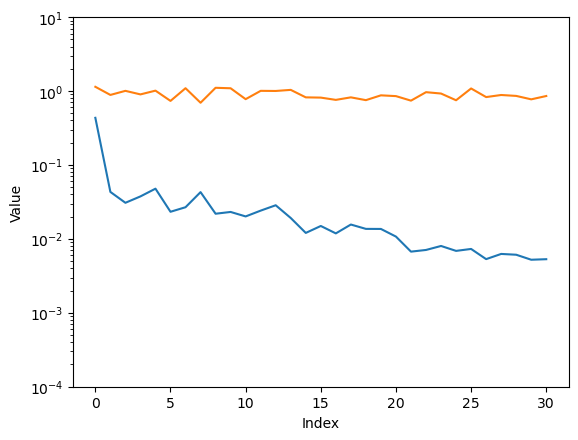

Last Validation Set


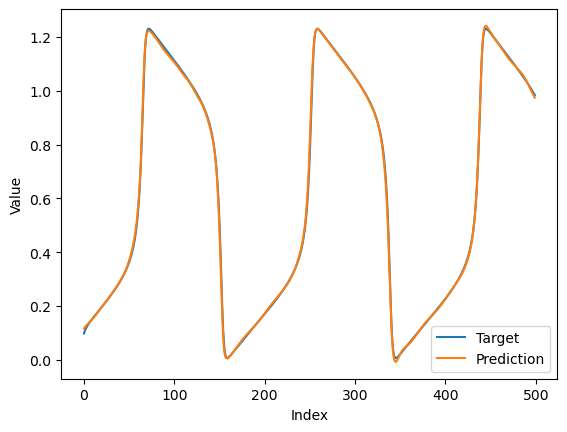

0.005314191


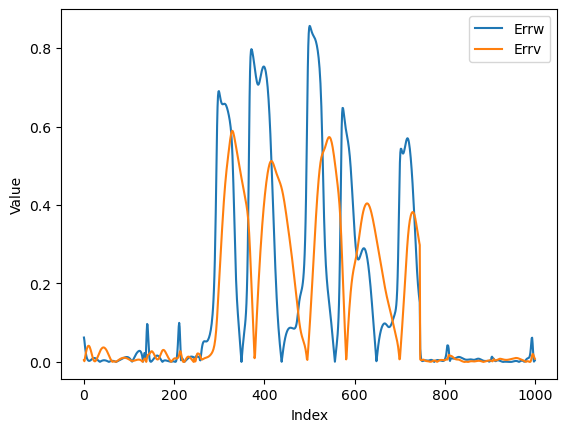

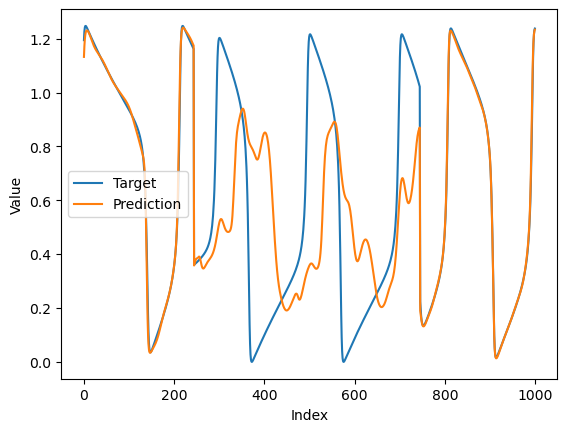

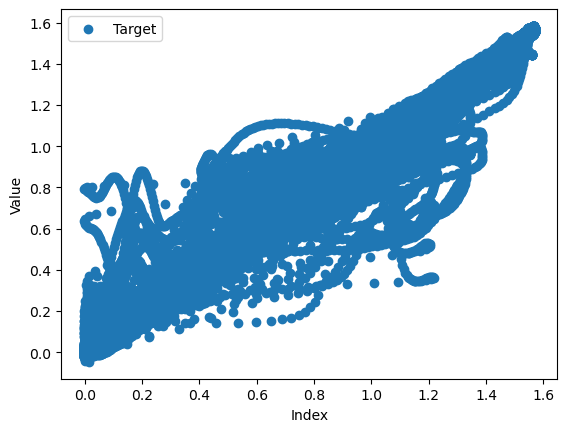

In [8]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

def plot_results(file_path):
    with h5py.File(file_path+"Val.h5", 'r') as hf:
        target = hf['target'][:]
        pred = hf['pred'][:]
            
    with h5py.File(file_path+"Val_err.h5", 'r') as hf:
        err = hf['error_stats'][:]
    window_size =500
    absolute_error =np.abs(target - pred)

    max_error_index = np.argmax(absolute_error.T[0])
    print(max_error_index)
   
    print(err)
    # Plot target and prediction around the region of maximum error
    start_index = max(0, max_error_index - window_size)

    end_index= start_index+window_size*2
    print("Val Error")
    plt.plot(err)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.ylim(1e-4,1e1)
    plt.savefig('save_results/siwss_tanh3_128.png')  # Save the figure as an image
    plt.show()
        
    print("Last Validation Set")
    plt.plot(target[:window_size, 0])
    plt.plot(pred[:window_size, 0])
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend(['Target', 'Prediction'])
    plt.show()

    print(np.mean(absolute_error))
    plt.plot(absolute_error[start_index:end_index])
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend(['Errw', 'Errv'])
    plt.show()
    
   

# Find index of maximum error
  
    plt.plot(target[start_index:end_index, 0], label='Target')
    plt.plot(pred[start_index:end_index, 0], label='Prediction')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    
    
    plt.scatter(target,pred)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend(['Target', 'Prediction'])
    plt.show()

# Call the plot_results function with the path to your HDF5 file
file_path = "trainer/"
plot_results(file_path)

max e(rr region:  0.38042188 0.097783715 0.74596953 0.0
max err nan
mean err nan
[0.         0.002      0.004      0.006      0.008      0.01
 0.012      0.014      0.016      0.018      0.02       0.022
 0.024      0.026      0.028      0.03       0.032      0.034
 0.036      0.038      0.04       0.042      0.044      0.046
 0.048      0.05       0.052      0.054      0.056      0.058
 0.06       0.062      0.064      0.066      0.068      0.07
 0.072      0.074      0.076      0.078      0.08       0.082
 0.084      0.086      0.088      0.09       0.092      0.094
 0.096      0.098      0.1        0.102      0.104      0.106
 0.108      0.11       0.11199998 0.114      0.116      0.118
 0.12       0.12199998 0.124      0.126      0.128      0.13
 0.13199998 0.134      0.136      0.138      0.14       0.14199997
 0.144      0.146      0.148      0.15       0.15199998 0.15399998
 0.156      0.158      0.16       0.16199999 0.164      0.16599998
 0.168      0.16999999 0.17199998 0.174

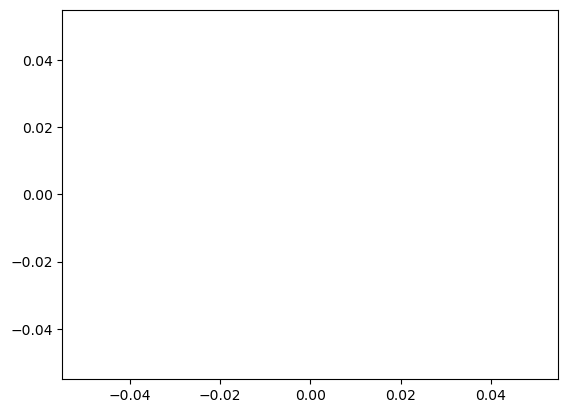

IAPP 0.38042188
W0 0.74596953
U0 0.097783715
X nan


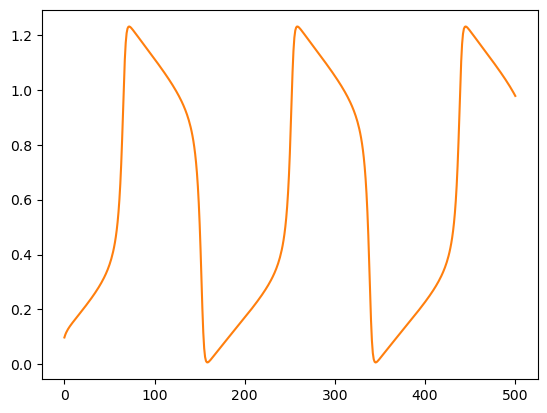

IAPP 0.38042188
W0 0.74596953
U0 0.097783715
IAPP 0.17263503
W0 0.95885444
U0 0.43078503
IAPP 0.8690561
W0 0.21884918
U0 0.77001387
IAPP 0.47450495
W0 0.023344569
U0 0.04259095
IAPP 0.76352286
W0 0.28062153
U0 0.7851935


IndexError: index 1 is out of bounds for axis 0 with size 1

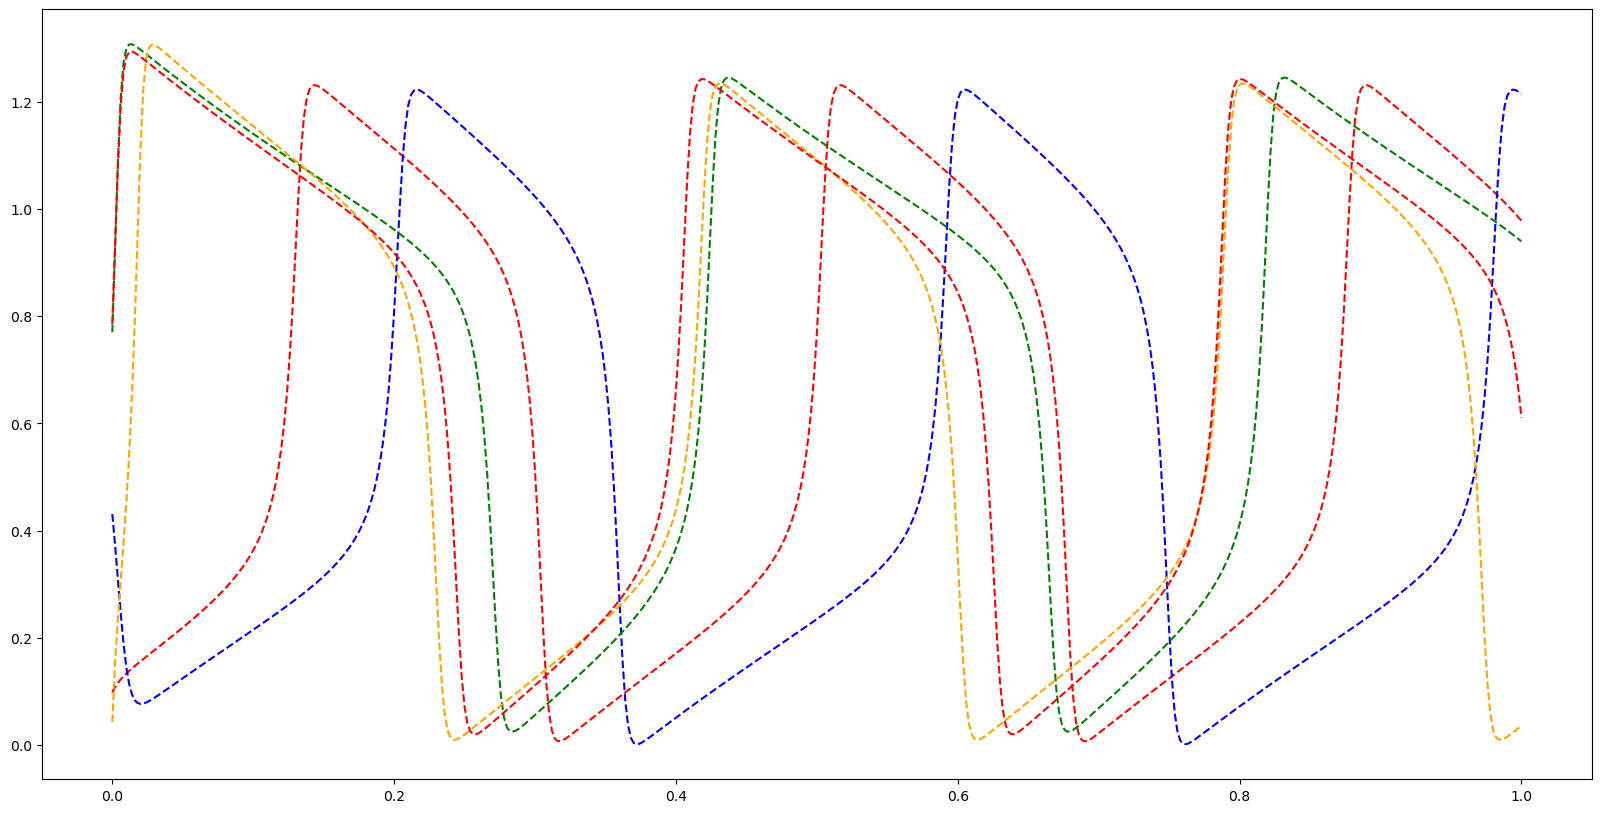

In [3]:
import operator
colors=["red","blue","green","orange","red","blue","green","yellow","orange"]

with h5py.File(file_path+"val.h5", 'r') as hf:
        T,U,V,K = np.array(hf['input']).T
        TX,TW = np.array(hf['target']).T
        X,W    =np.array(hf['pred']).T
        



E= ((X-TX)**2)**0.5


ae,m= max(enumerate(E), key=operator.itemgetter(1))
print("max e(rr region: ",K[ae],U[ae],V[ae],T[ae],)
print("max err",(np.max( ((X-TX)**2)**0.5) ))
print("mean err",(np.mean(X-TX)**2)**0.5)
print(np.unique(T))
e=lambda x:np.expand_dims(x,axis=1)


nc=len(U)//len(np.unique(T))

d=0

pred_u= np.reshape(X, (nc,len(X)//nc))
true_u= np.reshape(TX, (nc,len(X)//nc))
ks,us,vs=np.reshape(K, (nc,len(X)//nc)),np.reshape(U, (nc,len(X)//nc)),np.reshape(V, (nc,len(X)//nc))


k=3
plt.plot(X[0:5000])
plt.show()


N=0
print("IAPP",ks[N][1])
print("W0",vs[N][1])
print("U0",us[N][0])
print("X",pred_u[N][0])
plt.plot(pred_u[N])
plt.plot(true_u[N])
#print(true_u[N])


#############################################################################
plt.show()


max_error = float('-inf')
max_error_solution = None

for N in range(len(ks)):
  

    # Assuming pred_u and true_u are lists of predicted and true values for each solution
    current_error = np.max(np.abs(pred_u[N]- true_u[N]))


    # Update max_error_solution if the current solution has a higher error
    if current_error > max_error:
        max_error = current_error
        max_error_solution = N

# Plot the solution with the maximum error
if max_error_solution is not None:
    plt.plot(pred_u[max_error_solution], label="Max err Predicted")
    plt.plot(true_u[max_error_solution], label="True")
    N=max_error_solution
    print("IAPP",ks[N][1])
    print("W0",vs[N][1])
    print("U0",us[N][0])
    print("X",pred_u[N][0])

####################################################

u_k=np.unique(ks)
u_v=np.unique(vs)
u_u=np.unique(us)



#Ns=[i for i in range(nc) if  np.any(vs[i][10] ==u_v[8:11]) and ks[i][10]==u_k[6] and us[i][10]==u_u[2]]
Ns=[0,1,2,3,4,max_error_solution]
plt.figure(figsize=(20, 10))
for i,N in enumerate(Ns):
    print("IAPP",ks[N][1])
    print("W0",vs[N][1])
    print("U0",us[N][1])
    plt.plot(T[0:len(X)//nc],pred_u[N],label="W0"+str(us[N][1]),color=colors[i])
    plt.plot(T[0:len(X)//nc],true_u[N],"--",label="W0_T"+str(us[N][1]),color=colors[i])

plt.legend(loc="best")
plt.show()


Ns=[0,163,352]


data=pred_u[Ns,:]
datat=true_u[Ns,:]
datae=np.abs(true_u[Ns,:]-pred_u[Ns,:])

# Create a meshgrid for X and Y values
x = np.linspace(0, T[-1], np.shape(data)[1])
y = np.linspace(0, len(Ns), np.shape(data)[0])
X, Y = np.meshgrid(x, y)

# Create a figure and 3D Axes objects for subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': '3d'})





# Plot the surface color plots on each subplot
surfs = []
data_arrays = [datat, data, datae]
plot_titles = ['True', 'Pred', 'Error']
mi,ma=0,1
for i, ax in enumerate(axs):
    if(i==2):
        ax.set_zlim(0,0.1) 
        mi,ma=0,0.1
        
    surf = ax.plot_surface(X, Y, data_arrays[i], cmap='viridis',vmin=mi,vmax=ma)
    surfs.append(surf)
    ax.set_title(plot_titles[i])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Value')
    fig.colorbar(surf, ax=ax)
    if(i==2):
        ax.set_zlim(0,0.1) 
# Show the multi-plot
plt.tight_layout()
plt.show()

print("abc")


Ns=range(0,nc)

#Ns=range(200,250)
data=pred_u[Ns,:]
datat=true_u[Ns,:]
datae=np.abs(true_u[Ns,:]-pred_u[Ns,:])





# Create a meshgrid for X and Y values
x = np.linspace(0, T[-1], np.shape(data)[1])
y = np.linspace(0, len(Ns), np.shape(data)[0])
X, Y = np.meshgrid(x, y)

# Create a figure and 3D Axes objects for subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': '3d'})

# Plot the surface color plots on each subplot
surfs = []
data_arrays = [datat, data, datae]
plot_titles = ['True', 'Pred', 'Error']
mi,ma=0,1
for i, ax in enumerate(axs):
    if(i==2):
        ax.set_zlim(0,0.1) 
        mi,ma=0,0.1
        
    surf = ax.plot_surface(X, Y, data_arrays[i], cmap='viridis'
,vmin=mi,vmax=ma)
    surfs.append(surf)
    ax.set_title(plot_titles[i])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Value')
    fig.colorbar(surf, ax=ax)

# Show the multi-plot
plt.tight_layout()
plt.show()